# 다중 분류
- Wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [5]:
# X 데이터는 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [6]:
# y 데이터는 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    wine_std, Y, stratify=Y, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')          # 노드수는 y의 종류(N)수, 활성화 함수는 softmax
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 다중분류시 손실함수는 categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [13]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=100, batch_size=100)

Epoch 1/100
2/2 [==============================] - 2s 370ms/step - loss: 1.9052 - accuracy: 0.3097 - val_loss: 1.6885 - val_accuracy: 0.2414
Epoch 2/100
2/2 [==============================] - 0s 49ms/step - loss: 1.7975 - accuracy: 0.3274 - val_loss: 1.5971 - val_accuracy: 0.2414
Epoch 3/100
2/2 [==============================] - 0s 51ms/step - loss: 1.6979 - accuracy: 0.3274 - val_loss: 1.5142 - val_accuracy: 0.2414
Epoch 4/100
2/2 [==============================] - 0s 83ms/step - loss: 1.6102 - accuracy: 0.3363 - val_loss: 1.4398 - val_accuracy: 0.2759
Epoch 5/100
2/2 [==============================] - 0s 56ms/step - loss: 1.5276 - accuracy: 0.3363 - val_loss: 1.3735 - val_accuracy: 0.3103
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 1.4533 - accuracy: 0.3540 - val_loss: 1.3120 - val_accuracy: 0.3448
Epoch 7/100
2/2 [==============================] - 0s 54ms/step - loss: 1.3849 - accuracy: 0.3894 - val_loss: 1.2561 - val_accuracy: 0.3448
Epoch 8/100
2/2 [==

In [14]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.1301 - accuracy: 0.9722


[0.13005691766738892, 0.9722222089767456]

- 학습과정 시각화

In [15]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

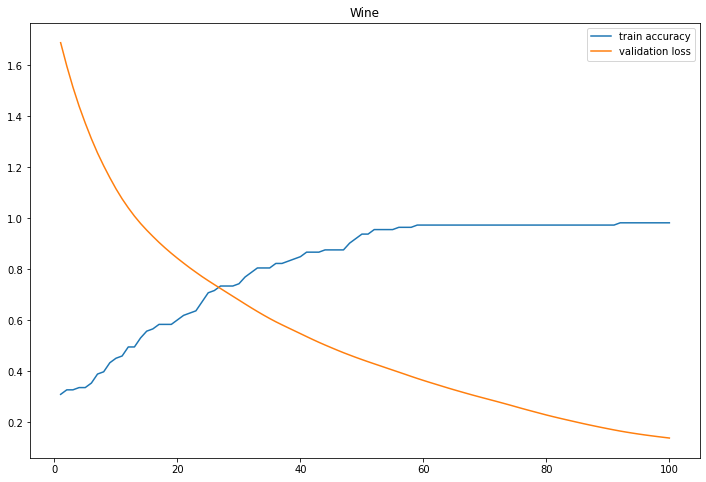

In [18]:
plt.figure(figsize=(12,8))
plt.title('Wine')
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.show()

- Epoch 횟수를 더 늘려서 학습을 해보자

In [26]:
model2 = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')          # 노드수는 y의 종류(N)수, 활성화 함수는 softmax
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                420       
                                                                 
 dense_7 (Dense)             (None, 12)                372       
                                                                 
 dense_8 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [28]:
hist2 = model2.fit(X_train, Y_train, validation_split=0.2,
                 epochs=1000, batch_size=100, verbose=0)

In [29]:
model2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 8.4200e-04 - accuracy: 1.0000


[0.0008420008816756308, 1.0]

In [30]:
y_acc2 = hist.history['accuracy']
y_vloss2 = hist.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

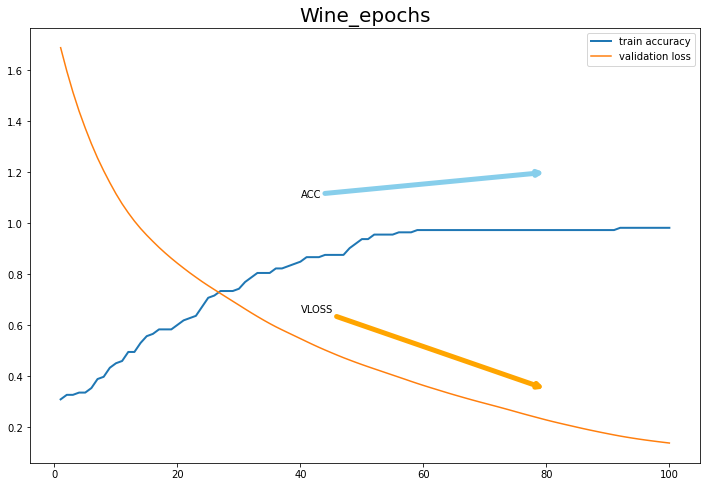

In [52]:
plt.figure(figsize=(12,8))
plt.title('Wine_epochs',size=20)
plt.annotate("ACC",
             xy=(80,1.2),
             xytext=(40,1.1),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))
plt.annotate("VLOSS",
             xy=(80,0.35),
             xytext=(40,0.65),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='orange', lw=5))
plt.plot(xs2, y_acc2, label='train accuracy', linewidth=2)
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(loc='best')
plt.show()

- 모델 저장 및 로드

In [32]:
model2.save('wine.h5')

In [33]:
!ls -l

total 48
drwxr-xr-x 1 root root  4096 May 17 13:39 sample_data
-rw-r--r-- 1 root root 43704 May 23 00:42 wine.h5


In [34]:
from tensorflow.keras.models import load_model
my_model = load_model('wine.h5')

In [35]:
my_model.evaluate(X_test, Y_test)

2/2 [==============================] - 1s 8ms/step - loss: 8.4200e-04 - accuracy: 1.0000


[0.0008420008816756308, 1.0]

- 실제 데이터로 테스트

In [36]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [43]:
my_model.evaluate(wine_std[100].reshape(1,-1), Y[100].reshape(1,-1))

1/1 [==============================] - 0s 37ms/step - loss: 5.3644e-06 - accuracy: 1.0000


[5.364403477869928e-06, 1.0]